In [1]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib as mpl
# enables correct plotting of text
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 

In [2]:
sc.settings.set_figure_params(dpi=80)

In [3]:
os.getcwd()

'/rfs/project/rfs-iCNyzSAaucw/kk837/notebooks/Foetal/Xenium/5K/C194_Hst45/CamU'

In [4]:
figdir = '/rfs/project/rfs-iCNyzSAaucw/kk837/notebooks/Foetal/fetal_ms_figures'
# table_dir = '/nfs/team205/heart/fetal_ms_figures/tables/Aug2024'

In [5]:
celltype_key = 'fine_grain_12Jun2025'

# Read in adata

In [6]:
objects_dir = '/home/kk837/rds/rds-teichlab-C9woKbOCf2Y/kk837/Foetal/anndata_objects/Xenium'
path_adata = f'{objects_dir}/C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_filtered_raw.h5ad'
adata = sc.read_h5ad(path_adata)
adata

AnnData object with n_obs × n_vars = 362277 × 5001
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'n_genes', 'tissue_block_id', 'celltypist_coarse', 'conf_score_coarse', 'celltypist_coarse_fin', 'celltypist_coarse2midmod', 'conf_score_coarse2midmod', 'celltypist_mid_fin', 'celltypist_midmod2fine', 'conf_score_midmod2fine', 'pca_harmony_leiden_0.2', 'pca_harmony_leiden_0.3', 'pca_harmony_leiden_0.4', 'pca_harmony_leiden_0.5', 'pca_harmony_leiden_0.8', 'pca_harmony_leiden_1.0', 'pca_harmony_leiden_1.5', 'pca_harmony_leiden_2.0', 'pca_harmony_leiden_

In [7]:
os.getcwd()

'/rfs/project/rfs-iCNyzSAaucw/kk837/notebooks/Foetal/Xenium/5K/C194_Hst45/CamU'

In [8]:
adata.X.data[:5]

array([5., 1., 1., 2., 2.], dtype=float32)

In [9]:
# celltype name mapping for plotting
df = pd.read_csv('/rfs/project/rfs-iCNyzSAaucw/kk837/notebooks/Foetal/finegrain_name_mapping.csv')
celltype_mapping = df.set_index('Full_name')['Short_name_finalised'].to_dict()
adata.obs.replace({celltype_key:celltype_mapping},inplace=True)

/tmp/ipykernel_968450/407166641.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs.replace({celltype_key:celltype_mapping},inplace=True)


# Log-normalisation

In [10]:
# log-normalise the count
sc.pp.normalize_total(adata,target_sum=1e4)
sc.pp.log1p(adata)
adata.X.data[:5]

array([4.2093534, 2.6576407, 2.6576407, 3.3151019, 3.3151019],
      dtype=float32)

# Plot cell types

In [11]:
set(adata.obs[celltype_key])

{'?EpendymalCells',
 '?EpithelialCells',
 '?SkeletalMuscle',
 '?ThyroidCells',
 'AVNPC',
 'AtrialCardiomyocytes_DoubletWithEC',
 'AtrialCardiomyocytes_DoubletWithFB',
 'B',
 'ChromC',
 'CorArtEC',
 'CorCapEC',
 'CorCapECCyc',
 'CorCapECN',
 'CorPeri',
 'CorSMC',
 'CorVenEC',
 'CoronaryCapillaryEndothelialCells_DoubletsWithEryth',
 'DASMC',
 'DC',
 'ELNeuro',
 'EPDC',
 'EndoCush',
 'Endocard',
 'EndocardCyc',
 'EndocardialCells_Doublets',
 'Eryth',
 'ErythCyc',
 'FB',
 'FBCOL2A1',
 'FBCyc',
 'GVArtEC',
 'GVSMC',
 'GVSMCCyc',
 'GVVenEC',
 'ILC',
 'LymphEC',
 'MPLYVE1',
 'MacCX3',
 'MastC',
 'MegaK',
 'MesEpiC',
 'Mono',
 'MyeloidCells_Doublets',
 'NeuroPre',
 'ParaN',
 'PericCyc',
 'PericFib',
 'PericInt',
 'SANPC',
 'SOX2_LAMB3_pos',
 'SchwC',
 'SchwCyc',
 'SchwP',
 'SchwannCells_DoubletsWithNeurons',
 'SympN',
 'TCD4',
 'TCD8',
 'ThyroidEpithelialCells',
 'VCSDist',
 'ValveEC',
 'aCMCyc',
 'aCML',
 'aCMR',
 'doublets',
 'unassigned',
 'unclassified',
 'vCM',
 'vCMCyc'}

/tmp/ipykernel_3227243/3010556783.py:4: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(slide,color=[celltype_col],


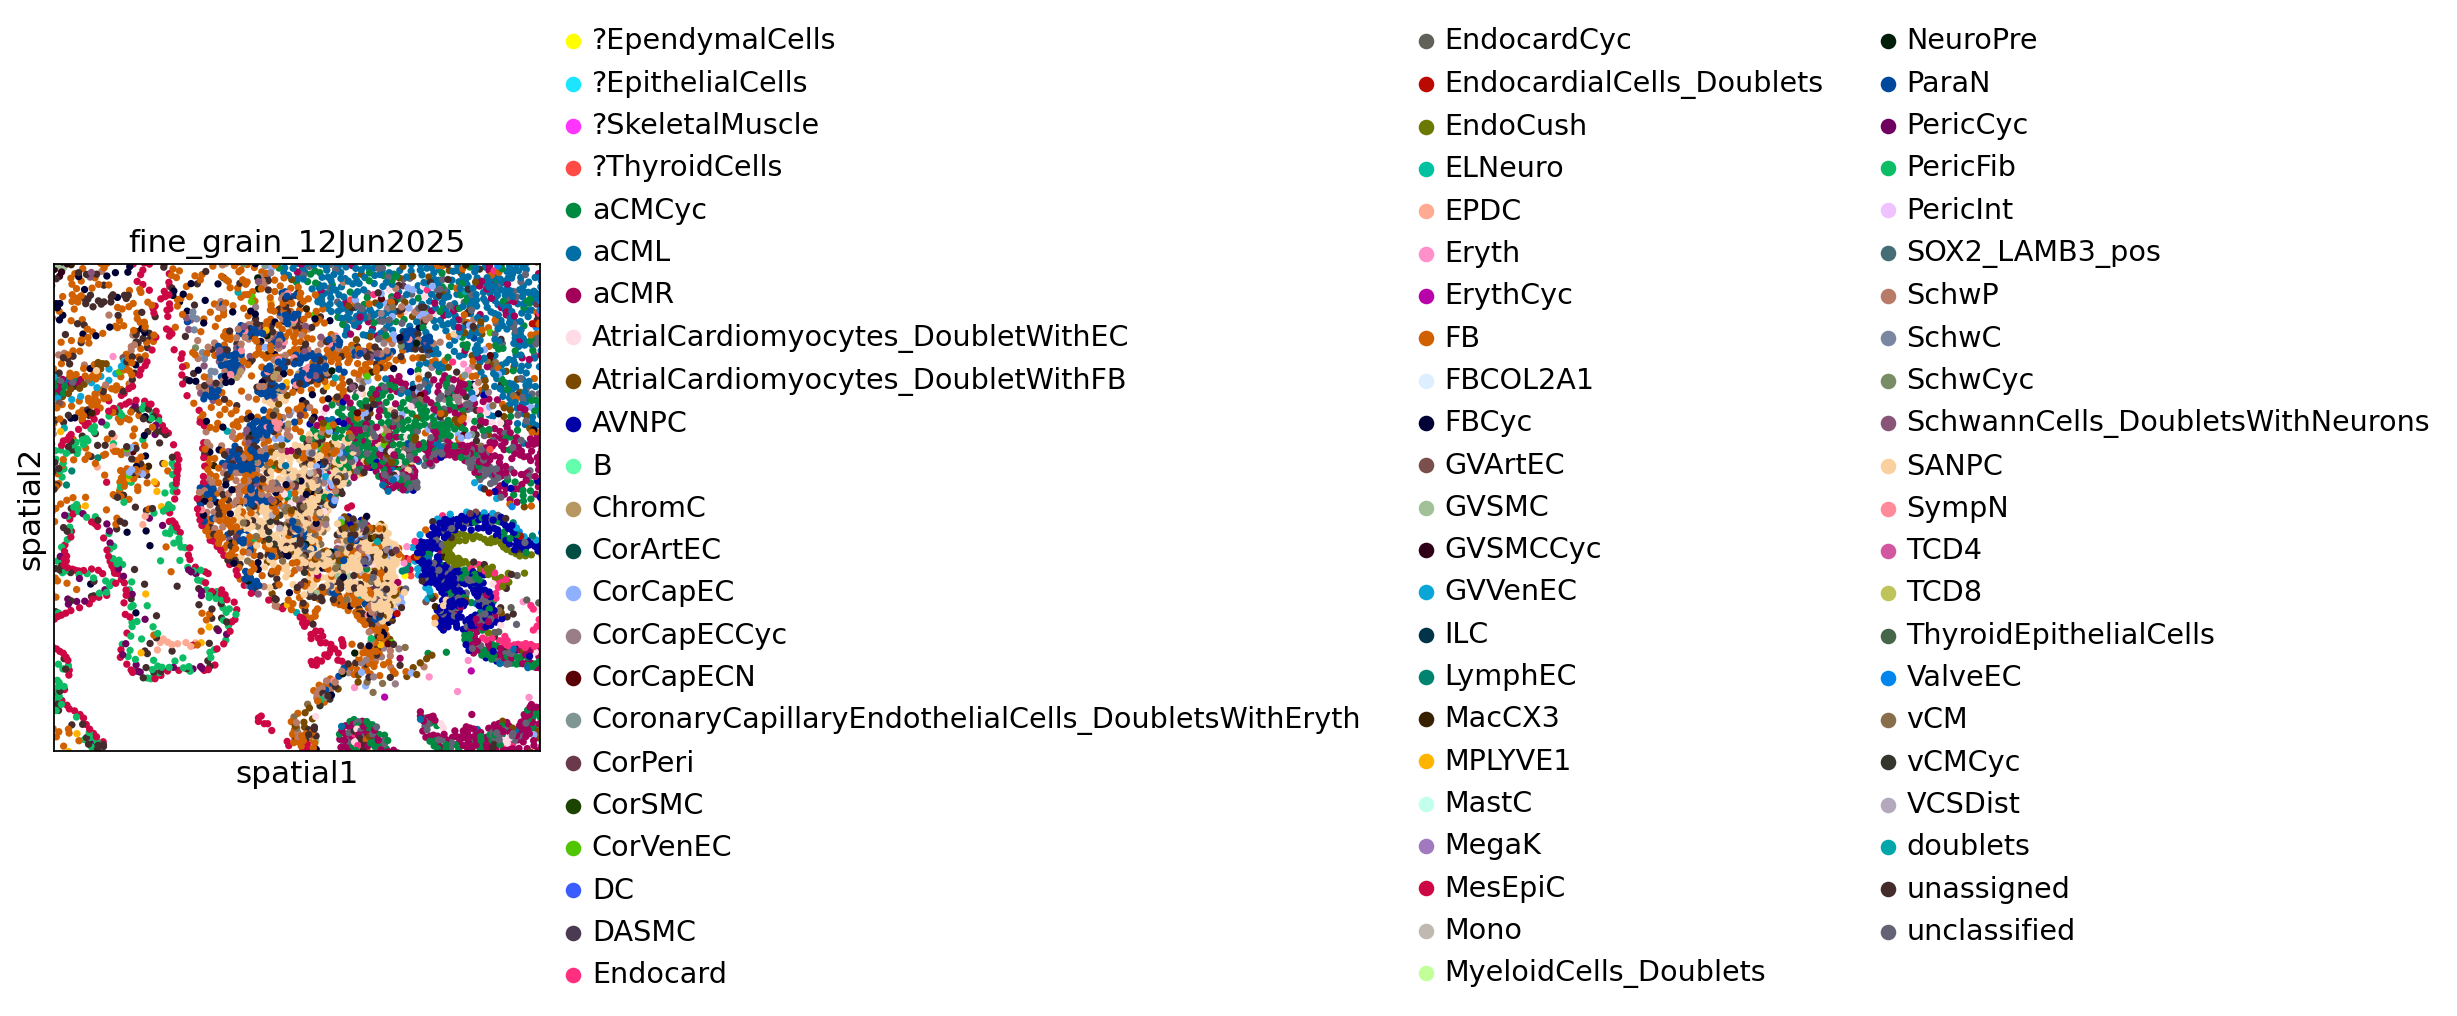

In [15]:
tissue_id = 'C194-HEA-0-FFPE-1'
slide = adata[adata.obs['tissue_block_id']==tissue_id]

sc.pl.spatial(slide,color=[celltype_key],
              spot_size=15,vmax='p100',
              crop_coord=(4600,5600,4250,5250)
             )

/tmp/ipykernel_3227243/2717981830.py:54: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(slide,color=[celltype_key],groups=celltypes_to_plot,
/home/kk837/.conda/envs/generic_env/lib/python3.10/site-packages/scanpy/plotting/_utils.py:406: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[color_key] = _palette
/home/kk837/.conda/envs/generic_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1148: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=palette[label], label=label)


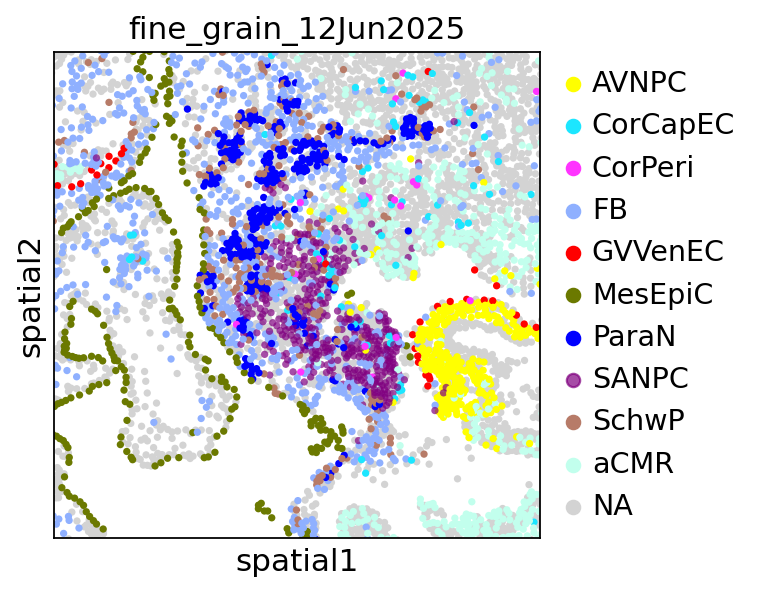

In [17]:
tissue_id = 'C194-HEA-0-FFPE-1'
slide = adata[adata.obs['tissue_block_id']==tissue_id]

celltypes_list = ['AVNPC', 'CorCapEC', 'CorPeri', 'DASMC', 'EPDC', 'EndoCush', 'Endocard',
       'Eryth', 'FB', 'GVSMC', 'GVSMCT', 'GVVenEC', 'LymphEC', 'MPLYVE1',
       'MacCX3', 'MesEpiC', 'MoDC', 'ParaN', 'PericFib', 'SANPC', 'SchwC',
       'SchwNeuro', 'ValveEC', 'ValveIC', 'aCML', 'aCMR']
color_list = ['#ffff00',
 '#1ce6ff',
 '#ff34ff',
 '#a30059',
 '#ffdbe5',
 '#63ffac',
 '#b79762',
 '#004d43',
 '#8fb0ff',
 '#997d87',
 '#5a0007',
 'red',
 '#4a3b53',
 '#ff2f80',
 '#ba0900',
 '#6b7900',
 '#00c2a0',
 'blue',
 '#b903aa',
 (0.5, 0.0, 0.5, 0.7),
 '#7b4f4b',
 '#013349',
 '#00846f',
 '#372101',
 '#ffb500',
 '#c2ffed',
 '#cc0744',
 '#c0b9b2']

for celltype,color in zip(celltypes_list,color_list):
    # update colors
    if celltype in set(slide.obs[celltype_key]):
        slide.uns[f"{celltype_key}_colors"][list(slide.obs[celltype_key].cat.categories).index(celltype)]=color

celltypes_to_plot = ['SANPC',
                     'CorCapEC',
                     'CorPeri',
                     'GVVenEC',
                     'MesEpiC',
                     'FB',
                     'aCMR',
                     'AVNPC',
                     'ParaN',
                     'SchwP',
                    ]

sc.pl.spatial(slide,color=[celltype_key],groups=celltypes_to_plot,
              spot_size=15,vmax='p100',
              crop_coord=(4600,5600,4250,5250),
              show=False
             )
plt.savefig(f'{figdir}/Xenium5K_euploid_SAN_for-Fig1.pdf',bbox_inches="tight",dpi=300)

# UMAP

/tmp/ipykernel_794362/455462603.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 448x160 with 0 Axes>

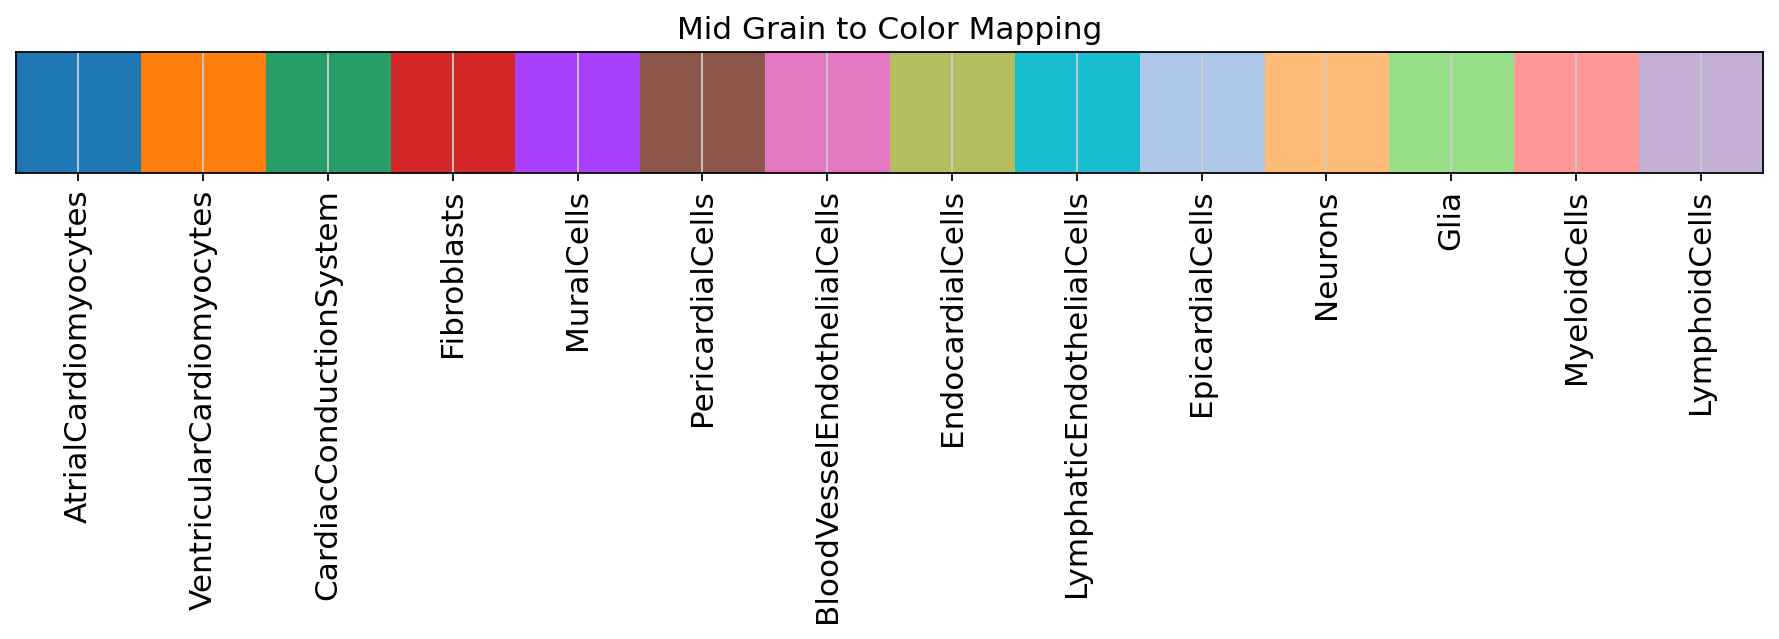

In [13]:
ADATA_PATH = "/rfs/project/rfs-iCNyzSAaucw/kk837/data_objects/Foetal/RNA/Feb28ObjectRaw_finegrain_updated.h5ad"
ad = sc.read_h5ad(ADATA_PATH, backed='r')

# Step 1: Create mapping (already done)
cat = "mid_grain"
mid2colours = dict(zip(ad.obs[cat].cat.categories, ad.uns[f"{cat}_colors"]))

# Step 2: Extract the labels and colors in the correct order
mid_grains = list(mid2colours.keys())
palette = list(mid2colours.values())
num_mid_grains = len(mid_grains)

# Step 3: Plot
plt.figure(figsize=(num_mid_grains * 0.4, 2))  # wide figure
sns.palplot(palette)
plt.xticks(np.arange(num_mid_grains), mid_grains, rotation=90)
plt.title("Mid Grain to Color Mapping")
plt.tight_layout()
plt.show()

In [14]:
adata.obs['celltypist_mid_fin'] = pd.Categorical(
    adata.obs['celltypist_mid_fin'],
    categories=ad.obs[cat].cat.categories,
    ordered=True
)

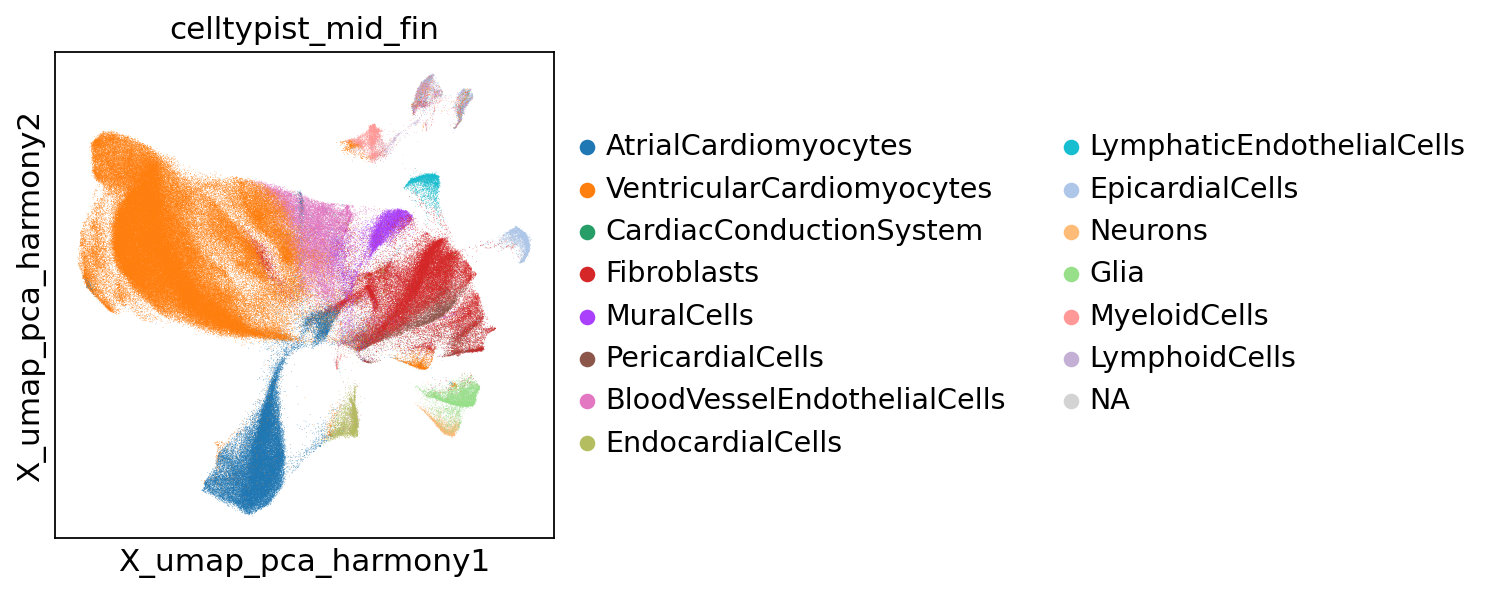

In [21]:
latent_space = 'pca_harmony'
sc.pl.embedding(adata,
                    basis=f"X_umap_{latent_space}",
                    color='celltypist_mid_fin',palette=palette,
                show=False
                   )
plt.savefig(f'{figdir}/Xenium5K_UMAP-midgrain_for-Fig1.pdf',bbox_inches="tight",dpi=300)

/tmp/ipykernel_794362/1888614849.py:4: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(slide,color=['celltypist_mid_fin'],


[<Axes: title={'center': 'celltypist_mid_fin'}, xlabel='spatial1', ylabel='spatial2'>]

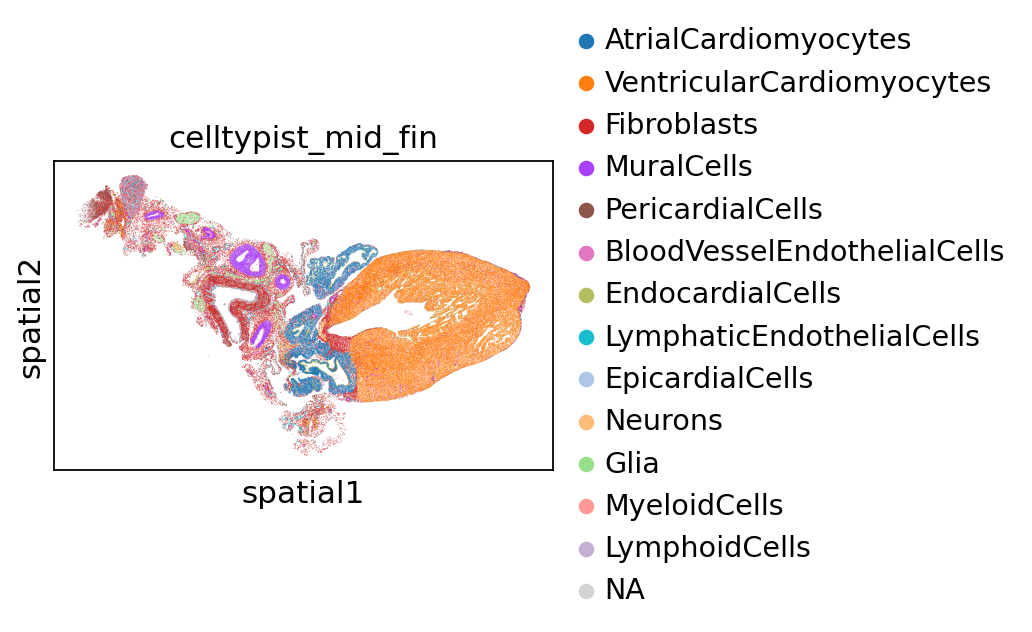

In [15]:
tissue_id = 'C194-HEA-0-FFPE-1'
slide = adata[adata.obs['tissue_block_id']==tissue_id]

sc.pl.spatial(slide,color=['celltypist_mid_fin'],
              spot_size=15,vmax='p100',
              # crop_coord=(4600,5600,4250,5250),
              show=False
             )
# plt.savefig(f'{figdir}/Xenium5K_euploid_SAN_for-Fig1.pdf',bbox_inches="tight",dpi=300)

# TissueTypist niches

In [11]:
AnnotationPalette={ 
    'Atrium':'#eac075',
        'Ventricle - Compact':'#f1acfa',
     'Ventricle - Trabeculated':'#f09951',
        'SAnode':'#8A2BE2',
        'AVnode':'#062b4a',
    'VCS - Proximal':'#FFFF00',
        'VCS - Distal':'#7FFFD4',
        'Epicardium':'#01ccc8',
        'Endocardium - Atrial':'#DC143C',
        'Endocardium - Ventricular':'#f53527',
        'Endocardial cusion':'#ff7e97',
        'Great vessel':'#ff9b6e',
    'Ductus arteriosus':'#8a6800',
        'Coronary vessel':'#206601',
        'Adventitia - Coronary':'#CAFF70',
     'Adventitia - GV':'#005aa0',
        'AV ring':'#e478ff',
    'Valves':'#3300FF',
    'LN':'#9088ff',
}

/tmp/ipykernel_968450/2063101229.py:4: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(slide,color=['tt_prediction'],
/home/kk837/.conda/envs/generic_env/lib/python3.10/site-packages/scanpy/plotting/_utils.py:487: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


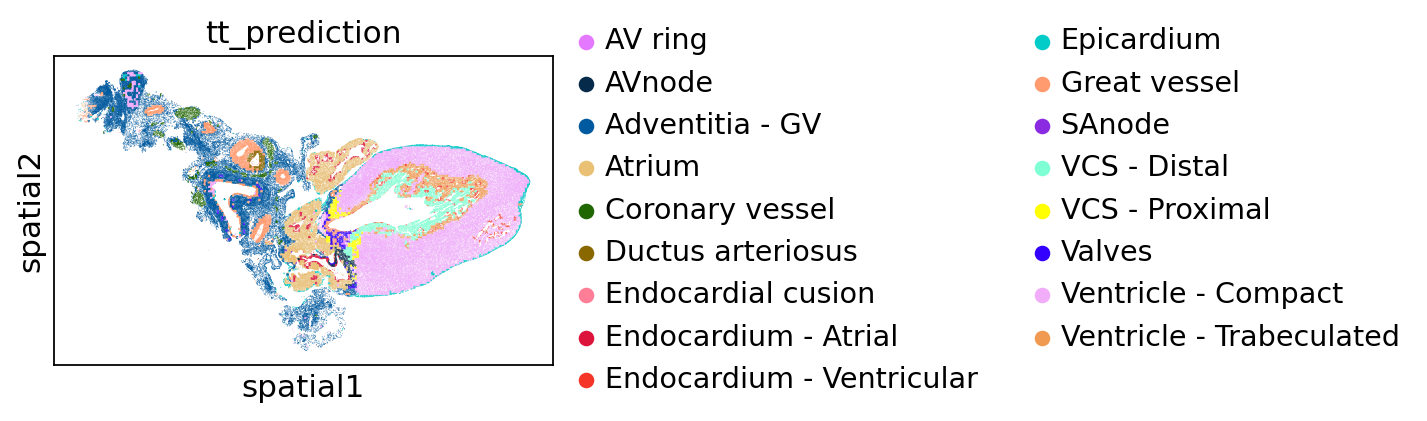

In [21]:
tissue_id = 'C194-HEA-0-FFPE-1'
slide = adata[adata.obs['tissue_block_id']==tissue_id]

sc.pl.spatial(slide,color=['tt_prediction'],
              spot_size=15,vmax='p100',
              # crop_coord=(4600,5600,4250,5250),
              show=False,
              palette=AnnotationPalette
             )
plt.savefig(f'{figdir}/TissueTypist_Xenium5K_whole-heart.pdf',bbox_inches="tight",dpi=300)

/tmp/ipykernel_968450/2129560865.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(slide,color=['tt_prediction'],


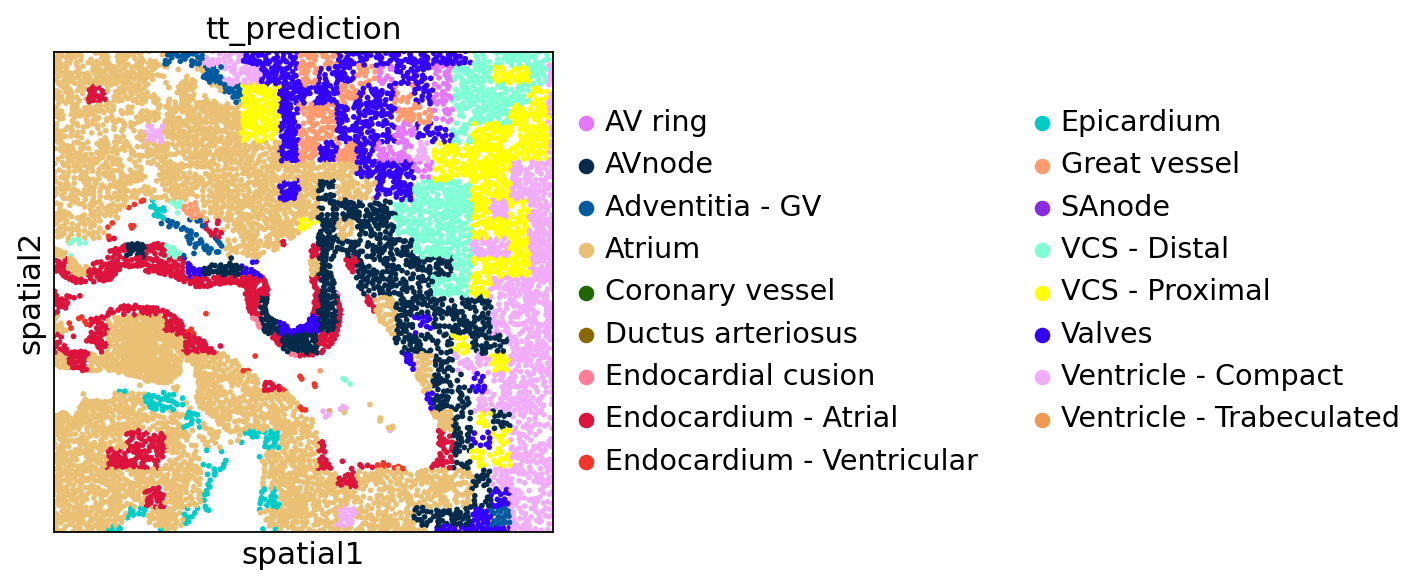

In [25]:
sc.pl.spatial(slide,color=['tt_prediction'],
              spot_size=15,vmax='p100',
              crop_coord=(5500,6800,4250,5500),
              show=False,
              palette=AnnotationPalette
             )
plt.savefig(f'{figdir}/TissueTypist_Xenium5K_Atrium-AVN.pdf',bbox_inches="tight",dpi=300)

/tmp/ipykernel_968450/2311424067.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(slide,color=['tt_prediction'],


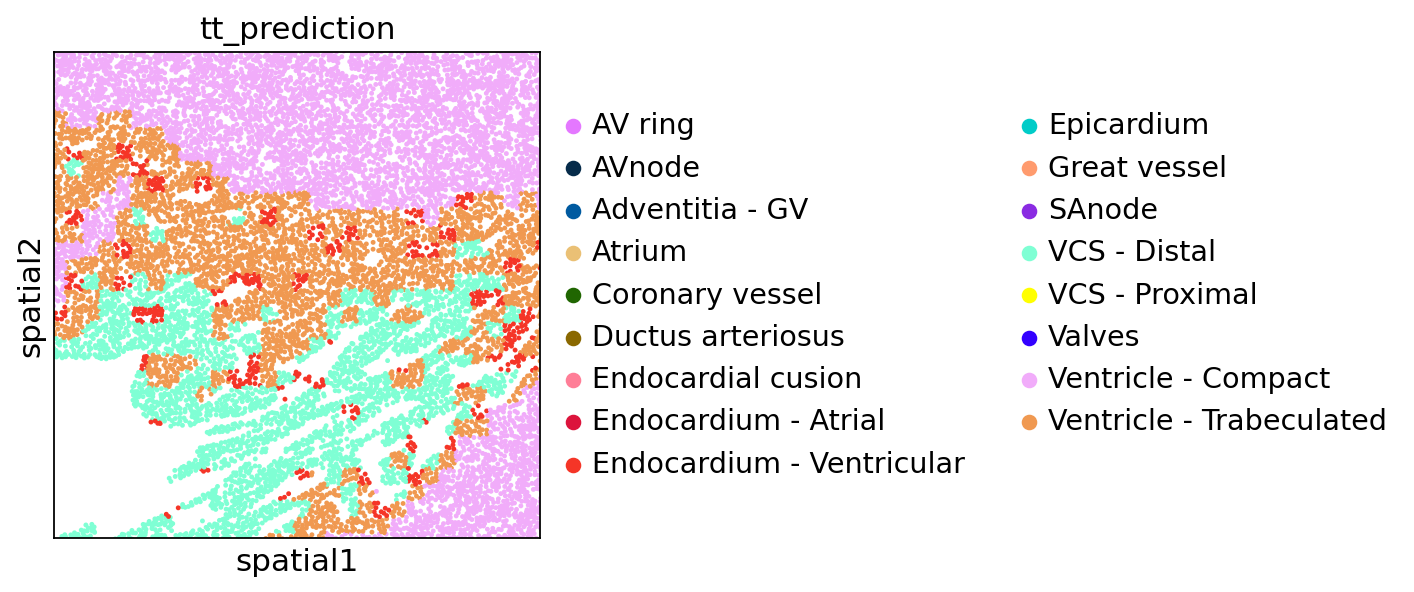

In [26]:
sc.pl.spatial(slide,color=['tt_prediction'],
              spot_size=15,vmax='p100',
              crop_coord=(8000,9500,2500,4000),
              show=False,
              palette=AnnotationPalette
             )
plt.savefig(f'{figdir}/TissueTypist_Xenium5K_Ventricle.pdf',bbox_inches="tight",dpi=300)

/tmp/ipykernel_968450/3875201264.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(slide,color=['tt_prediction'],


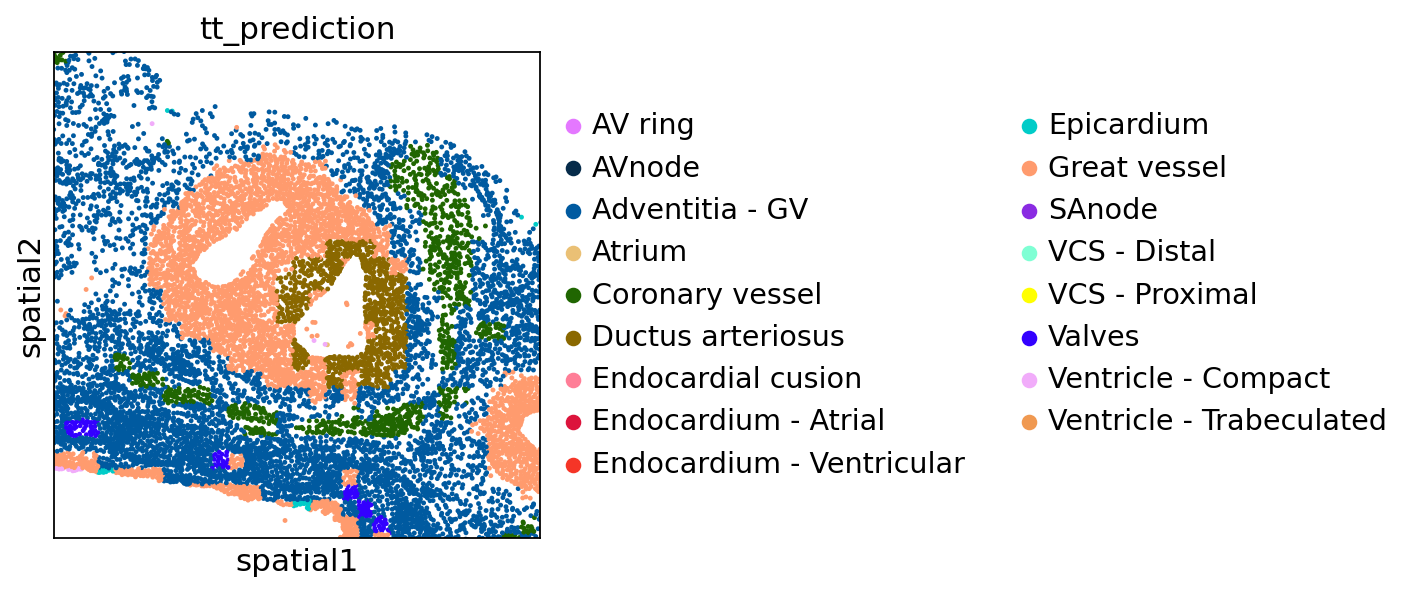

In [31]:
sc.pl.spatial(slide,color=['tt_prediction'],
              spot_size=15,vmax='p100',
              crop_coord=(3500,5000,1800,3300),
              show=False,
              palette=AnnotationPalette
             )
plt.savefig(f'{figdir}/TissueTypist_Xenium5K_GV.pdf',bbox_inches="tight",dpi=300)